# Notebook to visualize and analyze memento results, straight from the database dump.

Just needs a proper link to the latest /dump folder.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
print(os.environ.get('MYSQL_PROD_PASS'))

anelisebarrycamilo


## Pull content from DB

In [3]:
%cd ..

C:\Users\Camilo\Dropbox\Graduate Studies\Harvard\Thesis\memento_memory_game


In [4]:
%run ./scripts/dbops.py

Established connection.
Table ('levels',): dumped 482 records
Table ('presentations',): dumped 97913 records
Table ('users',): dumped 341 records
Table ('videos',): dumped 10045 records
Connection closed


In [12]:
# Read content into dataframe

DUMP_FOLDER = '../memento_memory_game/dump'

df_levels = pd.read_csv(os.path.join(DUMP_FOLDER, 'levels.csv'))
df_presentations = pd.read_csv(os.path.join(DUMP_FOLDER, 'presentations.csv'))
df_users = pd.read_csv(os.path.join(DUMP_FOLDER, 'users.csv'))
df_videos = pd.read_csv(os.path.join(DUMP_FOLDER, 'videos.csv'))

df_nona_levels = df_levels.dropna()
df_nona_presentations = df_presentations.dropna(subset=['response'])
df_nona_users = df_users.dropna()
df_nona_videos = df_videos.dropna()

In [6]:
pd.options.display.max_rows = 999
display(df_levels[df_levels['id_user']==96])

,id,id_user,assignment_id,hit_id,inputs_hash,score,vig_score,false_pos_rate,reward,insert_time
141,144,96,3QXNC7EIPLASG5K652FQ7EVJRKX093,3HEADTGN2R7CQMJECEY0V8QFHSIRV2,45c328d7c445714b3078f3bb82341907cdac8dbb1fa8cc...,NaN,NaN,NaN,NaN,2019-02-27 19:00:26


In [19]:
display(df_presentations)

,id,id_level,id_video,position,vigilance,targeted,duplicate,response,start_msec,duration_msec,media_error_code
0,1,1,34,0,0,1,0,NaN,NaN,NaN,NaN
1,2,1,24,1,0,1,0,NaN,NaN,NaN,NaN
2,3,1,25,2,0,1,0,NaN,NaN,NaN,NaN
3,4,1,26,3,0,1,0,NaN,NaN,NaN,NaN
4,5,1,1035,4,1,0,0,NaN,NaN,NaN,NaN
5,6,1,27,5,0,1,0,NaN,NaN,NaN,NaN
6,7,1,28,6,0,1,0,NaN,NaN,NaN,NaN
7,8,1,29,7,0,1,0,NaN,NaN,NaN,NaN
8,9,1,30,8,0,1,0,NaN,NaN,NaN,NaN
9,10,1,1035,9,1,0,1,NaN,NaN,NaN,NaN


## Statistics on contents of databases

In [21]:
print('Length df_levels:', len(df_levels))
print('Length df_presentations:', len(df_presentations))
print('Length df_users:', len(df_users))
print('Length df_videos:', len(df_videos))

print('')
print('Length df_nona_levels:', len(df_nona_levels))
print('Length df_nona_presentations:', len(df_nona_presentations))
print('Length df_nona_users:', len(df_nona_users))
print('Length df_nona_videos:', len(df_nona_videos))

Length df_levels: 482
Length df_presentations: 97913
Length df_users: 341
Length df_videos: 10045

Length df_nona_levels: 227
Length df_nona_presentations: 48785
Length df_nona_users: 341
Length df_nona_videos: 10045


In [25]:
def show_distribution(arr, title='Data', distplot=False, bins = 20):
    plt.figure(figsize=[8,5])
    if distplot:
        sns.distplot(arr)
    else:
        plt.hist(arr, bins = bins)
    mean = np.mean(arr)
    mi = np.min(arr)
    ma = np.max(arr)
    var = np.var(arr)
    n_values = len(arr)
    full_title = '%s. N: %d, Mean: %.2f, Var: %.2f, Max: %.2f, Min: %.2f' % (title, n_values, mean, var, ma, mi);
    plt.title(full_title);
    plt.show()

In [23]:
## Numerical statistics

# Number of distinct users that played so far
print('Number of distinct users that played so far:',len(df_users['worker_id'].unique()))

# Number of distinct users that finished at least one level
print('Number of distinct users that finished at least one level:',len(df_nona_levels['id_user'].unique()))

# Number of levels completed vs number of levels started
print('Number of levels started: %d. Number of levels completed: %d' % (len(df_levels), len(df_nona_levels)))

# Mean annotations per video
print('Mean annotations per video:', df_videos['labels'].mean())

# Max and min number of annotations on a video
print('Max and min annotations on a video:', df_videos['labels'].max(),df_videos['labels'].min())

# Number of videos with at east one annotation:
print('Number of videos with at least one annotation:',len(df_videos[df_videos['labels']>0]))

# Number of unique target video presentations with responses (should match prev number)
print('Number of unique target video presentations with responses:',len(df_nona_presentations[(df_nona_presentations['targeted']==1) & (df_nona_presentations['duplicate']==1)]['id_video'].unique()))

# Number of target responses collected
print('Number of target responses collected:',len(df_nona_presentations[(df_nona_presentations['targeted']==1) & (df_nona_presentations['duplicate']==1)]))

# Levels invalidated by vigiliance cutoff:
print('Levels invalidated by vigiliance cutoff:', np.sum(df_nona_levels['vig_score']<=0.7))

Number of distinct users that played so far: 341
Number of distinct users that finished at least one level: 210
Number of levels started: 482. Number of levels completed: 227
Mean annotations per video: 2.0340467894474865
Max and min annotations on a video: 3 2
Number of videos with at least one annotation: 10045
Number of unique target video presentations with responses: 7565
Number of target responses collected: 10184
Levels invalidated by vigiliance cutoff: 40


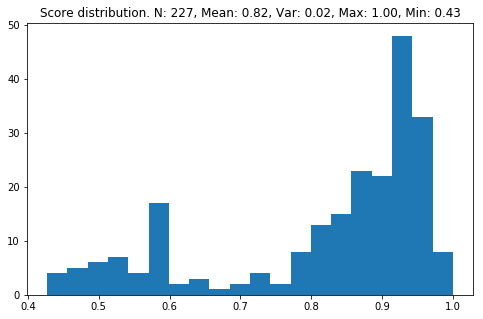

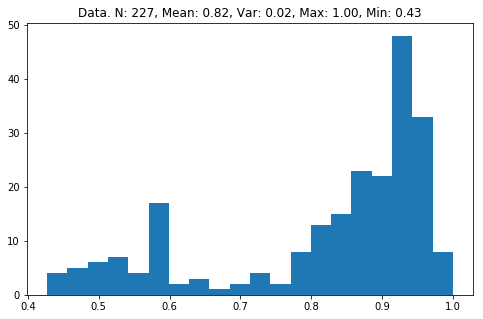

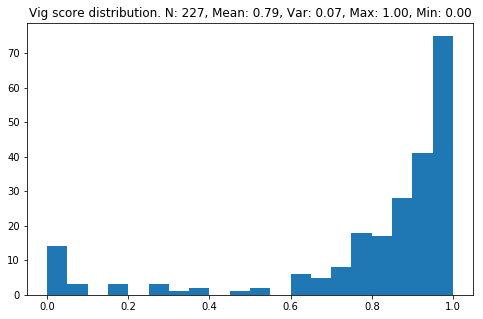

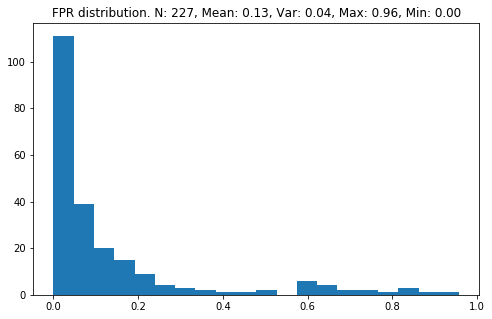

In [26]:
## Distributions

# Score distribution
show_distribution(df_nona_levels['score'], title='Score distribution')

# Target only score
show_distribution(df_nona_levels['score'])

# Vigilance score distribution
show_distribution(df_nona_levels['vig_score'], title='Vig score distribution')

# FPR distribution
show_distribution(df_nona_levels['false_pos_rate'], title='FPR distribution')


In [27]:
## Memorability
df_mem = df_videos

n_target_annotations = len(df_nona_presentations[(df_nona_presentations['targeted']==1) & (df_nona_presentations['duplicate']==1)])
n_unique_annotated = len(df_nona_presentations[(df_nona_presentations['targeted']==1) & (df_nona_presentations['duplicate']==1)]['id_video'].unique())
print('Num videos annotated more than once:', n_target_annotations-n_unique_annotated)
df_pres_mean = df_nona_presentations[(df_nona_presentations['targeted']==1) & (df_nona_presentations['duplicate']==1)].groupby('id_video').mean()

df_pres_mean.index = df_pres_mean['id']
df_mem['mem_score']=df_pres_mean['response']

show_distribution(df_pres_mean['response'], distplot=False)

Num videos annotated more than once: 2619


ValueError: cannot reindex from a duplicate axis

In [52]:
len(df_mean['id'].unique())

4784

In [47]:
display(df_mem)

,id,uri,labels,mem_score
0,1,cheering/flickr-1-6-5-2-7-9-6-9-6016527969_49.mp4,2,NaN
1,2,shaking/flickr-6-3-1-3-9-1-9-6-22363139196_28.mp4,2,1.0
2,3,sleeping/flickr-1-4-2-2-5-6-5-4-5314225654_7.mp4,2,1.0
3,4,erupting/4-9-0-4-8-4-8-7-3949048487.mp4,2,1.0
4,5,hitting/FJxJtLQk3JI_134.mp4,2,1.0
5,6,sitting/flickr-2-4-0-0-1-8-0-5-3024001805_4.mp4,2,1.0
6,7,selling/flickr-1-8-8-8484865188_14.mp4,2,1.0
7,8,standing/flickr-0-7-8-4184853078_7.mp4,2,1.0
8,9,raising/1-4-3-5-8-6-2-5-3114358625.mp4,2,1.0
9,10,shouting/LmpaLMyWD7c_575.mp4,2,1.0


In [62]:
len(df_nona_presentations)

1445